In [57]:
from kdtree import *
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import heapq
from sklearn.datasets import make_blobs
import math
import copy
import random

In [58]:
def euclidean_distance(coord1, coord2):
    return math.sqrt((coord1[0] - coord2[0])**2 + (coord1[1] - coord2[1])**2)

In [59]:
X, Y = make_blobs(n_samples=15, centers=90, random_state=42)
points = [(x,y) for x,y in X]

In [60]:
coord_to_id = {(x , y) : i for i , (x , y) in enumerate(points)}

In [61]:
tree = KDTree()
tree.root = tree.build(points)


In [62]:
def count_clusters(graph):
    return len(list(nx.connected_components(graph)))

In [63]:
def dcran(points):
    G = nx.Graph()

    for index, coord in enumerate(points):
        G.add_node(index, pos=coord)

    k = 1
    connected_components = 0
    while True :
        ran_dis = 2**k
        for i , pointi in enumerate(points):
            pointj = ith_nearest_neighbor(tree, pointi, k)
            dis = euclidean_distance(pointi , pointj)
            G.add_edge(i , coord_to_id[pointj] , weight = dis)
            
        curr_connected_components = count_clusters(G)
        
        if connected_components == curr_connected_components:
            break
        connected_components = curr_connected_components
        print(k ,curr_connected_components )
        k += 1
    return G
        
        

In [64]:
kc = dcran(points)

1 3
2 1


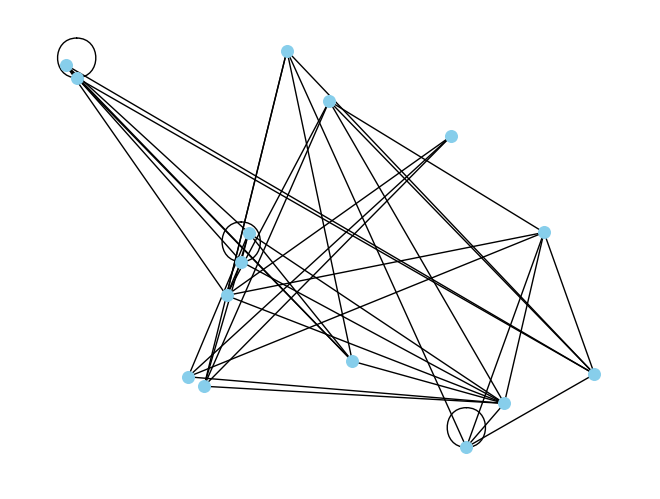

In [71]:
positions = nx.get_node_attributes(kc, 'pos')

# Draw the graph
nx.draw(kc, positions, node_color='skyblue', font_size=18, node_size=70)
plt.show()

In [66]:
G = kc
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

# Calculate the sum of all edge weights
total_weight = sum(data['weight'] for u, v, data in G.edges(data=True))

print(f"Total number of nodes: {num_nodes}")
print(f"Total number of edges: {num_edges}")
print(f"Total sum of edge weights: {total_weight}")


Total number of nodes: 15
Total number of edges: 42
Total sum of edge weights: 106.26202692763171


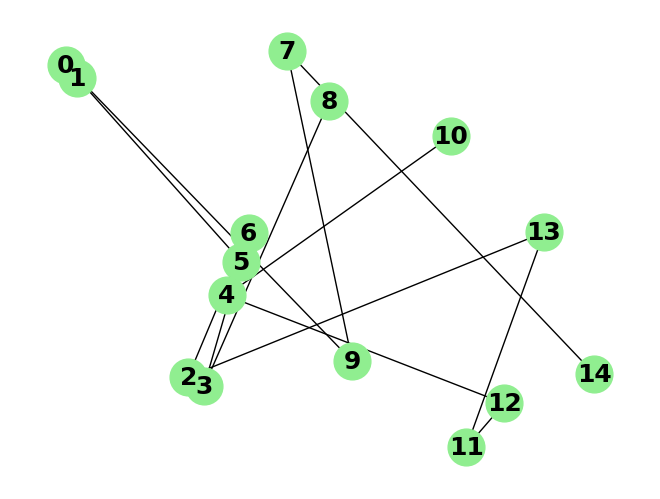

Edges in the MST:
[(0, 9, {'weight': 0.0}), (0, 5, {'weight': 0.0}), (0, 1, {'weight': 0.684403183560976}), (2, 13, {'weight': 0.0}), (2, 6, {'weight': 0.6788555340288496}), (3, 6, {'weight': 0.0}), (3, 8, {'weight': 0.0}), (4, 12, {'weight': 0.0}), (4, 10, {'weight': 0.0}), (5, 6, {'weight': 0.0}), (7, 14, {'weight': 0.0}), (7, 9, {'weight': 0.0}), (11, 13, {'weight': 0.0}), (11, 12, {'weight': 0.0})]


In [70]:
mst = nx.minimum_spanning_tree(G, algorithm='kruskal', weight='weight')

# Draw the MST
pos = {i: coord for i, coord in enumerate(points)}
nx.draw(mst, pos, with_labels=True, font_weight='bold', node_color='lightgreen', font_size=18, node_size=700)
plt.show()

# Print the edges in the MST along with their weights
print("Edges in the MST:", list(mst.edges(data=True)) , sep='\n')

In [68]:
G = mst
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

# Calculate the sum of all edge weights
total_weight = sum(data['weight'] for u, v, data in G.edges(data=True))

print(f"Total number of nodes: {num_nodes}")
print(f"Total number of edges: {num_edges}")
print(f"Total sum of edge weights: {total_weight}")

Total number of nodes: 15
Total number of edges: 14
Total sum of edge weights: 1.3632587175898254


In [17]:
def dckan(points):
    NN = {pt:set() for pt in points}
    G = nx.Graph()
    k = 1
    connected_components = 0
    while True :
        ran_dis = random.randint(2,len(points)-1)
        for pointi in points:
            pointj = ith_nearest_neighbor(tree, pointi, k)
            G.add_edge(pointi, pointj)
            # ran_prob = random.randint(0,100)
            # if ran_prob <= 1 :
            #     pointj = ith_nearest_neighbor(tree, pointi, ran_dis)
            #     G.add_edge(pointi, pointj)
        curr_connected_components = len(list(nx.connected_components(G)))
        
        if connected_components == curr_connected_components:
            break
        connected_components = curr_connected_components
        print(k ,curr_connected_components )
        k += 1
    return k
        
        

In [18]:
kc = dckan(points)

1 15000
2 4657
3 717
4 34
5 2
6 1


In [19]:
def dcyan(points):
    NN = {pt:set() for pt in points}
    G = nx.Graph()
    k = 1
    connected_components = 0
    while True :
        ran_dis = min(2**k,len(points)-1)
        for pointi in points:
            pointj = ith_nearest_neighbor(tree, pointi, k)
            G.add_edge(pointi, pointj)
            pointj = ith_nearest_neighbor(tree, pointi, ran_dis)
            G.add_edge(pointi, pointj)
            # ran_prob = random.randint(0,100)
            # if ran_prob <= 1 :
            #     pointj = ith_nearest_neighbor(tree, pointi, ran_dis)
            #     G.add_edge(pointi, pointj)
        curr_connected_components = len(list(nx.connected_components(G)))
        
        if connected_components == curr_connected_components:
            break
        connected_components = curr_connected_components
        print(k ,curr_connected_components )
        k += 1
    return k
        
        

In [20]:
dcyan(points)

1 4657
2 130
3 1


4

In [21]:
# kcnt = []
# for ns in [10 , 100 , 1000 , 10000 , 100000] :
#     for nc in [5 , 10 ,20 , 30 , 40 , 50 , 100 , 500 , 1000 , 5000 ]:
#         if ns < nc:
#             continue
#         X, Y = make_blobs(n_samples=ns, centers=nc,  random_state=42)
#         points = [(x,y) for x,y in X]
#         kc = dckan(points)
#         print("pointcount = " ,str(ns).zfill(6) , " | clusterscount = " , str(nc).zfill(4) , " |value of k = " , kc)
#         kcnt.append([ns , nc , kc])
        

In [22]:
# import json

# my_list = [1, 2, 3, 4, 5 ,[2 , "jkk" , 3]]
# with open('list.json', 'w') as f:
#     json.dump(kcnt, f)

In [23]:
# plt.scatter(kcnt[0] , kcnt[2], c='blue', label='Data Points')
# plt.show()

In [24]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# data = [[10, 5, 2], [10, 10, 2], [100, 5, 3], [100, 10, 5], [100, 20, 10], [100, 30, 6], [100, 40, 5], [100, 50, 10], [100, 100, 10], [1000, 5, 28], [1000, 10, 31], [1000, 20, 47], [1000, 30, 46], [1000, 40, 38], [1000, 50, 29], [1000, 100, 34], [1000, 500, 34], [1000, 1000, 34], [10000, 5, 18], [10000, 10, 10], [10000, 20, 11], [10000, 30, 13], [10000, 40, 15], [10000, 50, 15], [10000, 100, 22], [10000, 500, 18], [10000, 1000, 17], [10000, 5000, 24], [100000, 5, 11], [100000, 10, 4], [100000, 20, 4], [100000, 30, 5], [100000, 40, 5], [100000, 50, 7], [100000, 100, 6], [100000, 500, 8], [100000, 1000, 7], [100000, 5000, 7]]

# x = [item[0] for item in data]
# y = [item[2] for item in data]
# # z = [item[2] for item in data]

# fig = plt.figure()
# ax = fig.add_subplot(111,)

# ax.scatter(x, y, c='r', marker='o')
# ax.set_xscale('log')

# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# # ax.set_zlabel('Z')

# plt.show()


In [25]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# data = [[10, 5, 2], [10, 10, 2], [100, 5, 3], [100, 10, 5], [100, 20, 10], [100, 30, 6], [100, 40, 5], [100, 50, 10], [100, 100, 10], [1000, 5, 28], [1000, 10, 31], [1000, 20, 47], [1000, 30, 46], [1000, 40, 38], [1000, 50, 29], [1000, 100, 34], [1000, 500, 34], [1000, 1000, 34], [10000, 5, 18], [10000, 10, 10], [10000, 20, 11], [10000, 30, 13], [10000, 40, 15], [10000, 50, 15], [10000, 100, 22], [10000, 500, 18], [10000, 1000, 17], [10000, 5000, 24], [100000, 5, 11], [100000, 10, 4], [100000, 20, 4], [100000, 30, 5], [100000, 40, 5], [100000, 50, 7], [100000, 100, 6], [100000, 500, 8], [100000, 1000, 7], [100000, 5000, 7]]

# x = [item[1] for item in data]
# y = [item[2] for item in data]
# # z = [item[2] for item in data]

# fig = plt.figure()
# ax = fig.add_subplot(111,)

# ax.scatter(x, y, c='r', marker='o')
# ax.set_xscale('log')

# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# # ax.set_zlabel('Z')

# plt.show()


In [26]:
import networkx as nx
import math

# Function to calculate the Euclidean distance between two points
def euclidean_distance(point1, point2):
    return math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

# Create an empty graph
G = nx.Graph()

# Add nodes with their coordinates as attributes
G.add_nodes_from([
    ('A', {'pos': (0, 0)}),
    ('B', {'pos': (1, 0)}),
    ('C', {'pos': (1, 1)}),
    ('D', {'pos': (0, 1)})
])

# Add edges with weights calculated based on Euclidean distance
for node1 in G.nodes(data=True):
    for node2 in G.nodes(data=True):
        if node1[0] != node2[0]:
            dist = euclidean_distance(node1[1]['pos'], node2[1]['pos'])
            G.add_edge(node1[0], node2[0], weight=dist)

# Find the Minimum Spanning Tree using Kruskal's algorithm
mst = nx.minimum_spanning_tree(G, algorithm='kruskal', weight='weight')

# Print the edges in the Minimum Spanning Tree
print("Edges in the MST:", list(mst.edges(data=True)))


Edges in the MST: [('A', 'B', {'weight': 1.0}), ('A', 'D', {'weight': 1.0}), ('B', 'C', {'weight': 1.0})]


In [27]:
import networkx as nx
import math

# Function to calculate Euclidean distance between two points
def euclidean_distance(coord1, coord2):
    return math.sqrt((coord1[0] - coord2[0])**2 + (coord1[1] - coord2[1])**2)

# Initialize an empty graph
G = nx.Graph()

# Define nodes and their positions
positions = {
    'A': (0, 0),
    'B': (1, 0),
    'C': (1, 1),
    'D': (0, 1),
    'E': (0.5, 0.5)
}

# Add nodes to the graph
G.add_nodes_from(positions.keys())

# Calculate edge weights based on Euclidean distance and add edges to the graph
for node1, coord1 in positions.items():
    for node2, coord2 in positions.items():
        if node1 != node2:
            distance = euclidean_distance(coord1, coord2)
            G.add_edge(node1, node2, weight=distance)

# Find the Minimum Spanning Tree
mst = nx.minimum_spanning_tree(G, algorithm='kruskal', weight='weight')

# Print the edges of the Minimum Spanning Tree
print("Edges in the MST:", list(mst.edges(data=True)))


Edges in the MST: [('A', 'E', {'weight': 0.7071067811865476}), ('B', 'E', {'weight': 0.7071067811865476}), ('C', 'E', {'weight': 0.7071067811865476}), ('D', 'E', {'weight': 0.7071067811865476})]


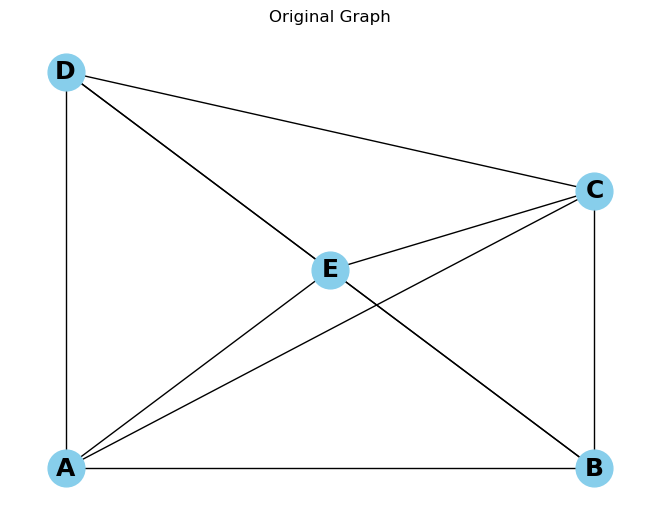

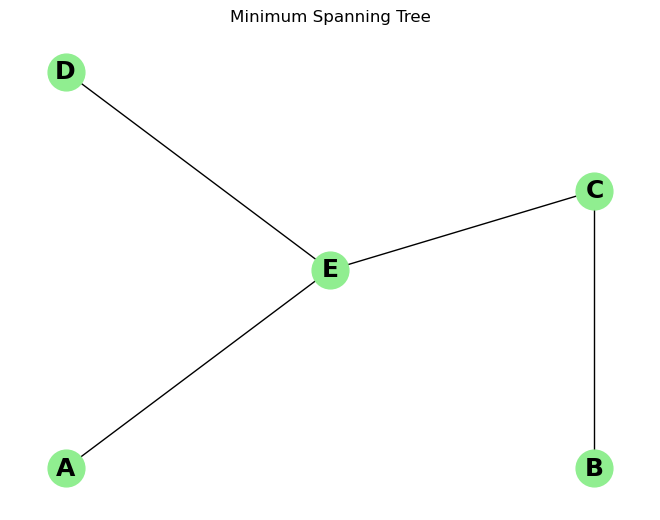

In [28]:
import networkx as nx
import matplotlib.pyplot as plt
import math

# Function to calculate the Euclidean distance between two points
def euclidean_distance(coord1, coord2):
    return math.sqrt((coord1[0] - coord2[0])**2 + (coord1[1] - coord2[1])**2)

# Initialize an empty graph
G = nx.Graph()

# Define nodes and their positions
positions = {
    'A': (0, 0),
    'B': (1, 0),
    'C': (1, 0.7),
    'D': (0, 1),
    'E': (0.5, 0.5)
}

# Add nodes to the graph
G.add_nodes_from(positions.keys())

# Calculate edge weights based on Euclidean distance and add edges to the graph
for node1, coord1 in positions.items():
    for node2, coord2 in positions.items():
        if node1 != node2:
            distance = euclidean_distance(coord1, coord2)
            G.add_edge(node1, node2, weight=distance)

# Find the Minimum Spanning Tree
mst = nx.minimum_spanning_tree(G, algorithm='kruskal', weight='weight')

# Draw the original graph
nx.draw(G, positions, with_labels=True, font_weight='bold', node_color='skyblue', font_size=18, node_size=700)
plt.title('Original Graph')
plt.show()

# Draw the Minimum Spanning Tree
nx.draw(mst, positions, with_labels=True, font_weight='bold', node_color='lightgreen', font_size=18, node_size=700)
plt.title('Minimum Spanning Tree')
plt.show()


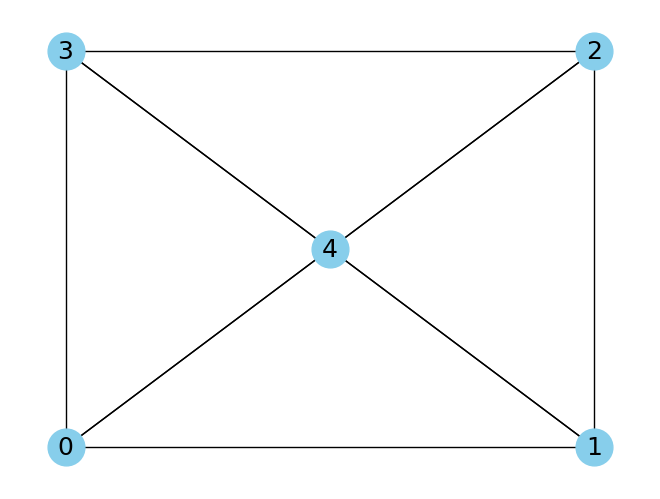

In [29]:
import networkx as nx
import matplotlib.pyplot as plt
import math

# Function to calculate the Euclidean distance between two points


# List of x and y coordinates
coordinates = [(0, 0), (1, 0), (1, 1), (0, 1), (0.5, 0.5)]

# Initialize an empty graph
G = nx.Graph()

# Add nodes to the graph with coordinates as attributes
for index, coord in enumerate(coordinates):
    G.add_node(index, pos=coord)

# Calculate edge weights based on Euclidean distance and add edges to the graph
for i, coord1 in enumerate(coordinates):
    for j, coord2 in enumerate(coordinates):
        if i != j:
            distance = euclidean_distance(coord1, coord2)
            G.add_edge(i, j, weight=distance)

# Get positions from node attributes
positions = nx.get_node_attributes(G, 'pos')

# Draw the graph
nx.draw(G, positions, with_labels=True, node_color='skyblue', font_size=18, node_size=700)
plt.show()
